In [ ]:
import sys
from google.colab import files
sys.path.insert(0,'/content/drive/MyDrive/IR-Project-Colab')

In [ ]:
!cp /content/drive/MyDrive/IR-Project-Colab/Utilities.py /content 
!cp /content/drive/MyDrive/IR-Project-Colab/KNNImpute.py /content

In [1]:
import Utilities  #THIS IS FOR GOOGLE COLAB USERS ONLY
import KNNImpute

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import TfidfVectorizer   # Turning textual data into numeric for computation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder               # For encoding categorical target attr
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm   # Baseline
from sklearn.svm import SVC

# ------- Validation metrics
from sklearn.metrics import accuracy_score    
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss                  
from sklearn.metrics import classification_report



### ***READING CSV AND KNN IMPUTE***

In [3]:
nltk.download('stopwords')
import pandas as pd
labels=["country", "sku_id", "title", "category_lvl1","category_lvl2","category_lvl3", "description", "price", "type"]

def getTrainingDataset():
    return pd.read_csv('data_train.csv', header=None, names=labels)  


def NullStatistics(df):
    missing_val = df.isnull().sum()
    print(missing_val)
    total_cells = np.product(df.shape)
    missing_percent = (missing_val.sum()/total_cells) *100
    print(f'\nThe missing data percent is: {missing_percent}')

trainingDataset=getTrainingDataset()

train_df,Y1,Y2,Y3=Utilities.Cleaning_Data_Utility(trainingDataset) #Utilities. hatadena yahan se 
# print(train_df)

NullStatistics(train_df)

unique_label_c1, unique_label_c2, unique_label_c3 = KNNImpute.preserve_label(train_df) #It has all unique values lying in ctg1 , 2 , 3 column

KNNImpute.encode(['category_lvl1', 'category_lvl2', 'category_lvl3'],train_df)        #Performed encoding for CTGLVL3 KNN

train_df_imputed = KNNImpute.impute(train_df)
train_df_imputed =  KNNImpute.clean_csv(train_df_imputed,train_df)
NullStatistics(train_df_imputed)

[nltk_data] Downloading package stopwords to C:\Users\Computer
[nltk_data]     Point\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        Adana Gallery Suri Square Hijab – Light Pink <...
1        Cuba Heartbreaker Eau De Parfum Spray 100ml/3....
2        Andoer 150cm Cellphone Smartphone Mini Dual-He...
3        ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...
4        Argital Argiltubo Green Clay For Face and Body...
                               ...                        
36278    SADES K10 LED Backlit Wired USB Mechanical Gam...
36279    SONA 20L Electric Oven SEO 2220 <ul> <li>&nbsp...
36280    OP1001 Portable Wireless Bluetooth 2.1 Speaker...
36281    Woot-Woot TicTacToe Pillow Case (White) <ul> <...
36282    New Smart Wristband D21 Smart Bracelet Heart R...
Name: titleDescp, Length: 36283, dtype: object
category_lvl1       0
category_lvl2       0
category_lvl3    2135
titleDescp          0
dtype: int64

The missing data percent is: 1.4710746079431138


C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

The missing data percent is: 0.0


### ***FEATURE ENGINEERING***

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Turning textual data into numeric for computation
X = train_df_imputed['Title_desc']
Y1 = train_df_imputed['category_lvl1']
Y2 = train_df_imputed['category_lvl2']
Y3 = train_df_imputed['category_lvl3']

vectorizer = TfidfVectorizer()  #Only once

vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)
# print(X_tfidf)

### ***MODEL TRAINING***

### *CATEGORY* 1 

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# X_tfidf.reshape(-1,1)
# X_tfidf
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y1, test_size=0.3, random_state=42)
print (X_train.shape)
print (X_test.shape)

SVM_Classfier=SVC(kernel='linear' , random_state=0)
model1 = SVM_Classfier.fit(X_train,y_train)
Y_Pred_c1=model1.predict(X_test)


print(Y_Pred_c1)
90.47

(8286, 17794)
(3552, 17794)
[7. 4. 4. ... 8. 4. 1.]


90.47

### *CATEGORY 1 STATISTICS*

Accuracy score with linear kernel is : 
90.1463963963964
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       208
         1.0       0.92      0.85      0.88       293
         2.0       0.96      0.92      0.94       544
         3.0       0.94      0.90      0.92       403
         4.0       0.77      0.93      0.84       599
         5.0       0.92      0.75      0.82       154
         6.0       0.96      0.94      0.95       704
         7.0       0.82      0.82      0.82       235
         8.0       0.95      0.93      0.94       412

    accuracy                           0.90      3552
   macro avg       0.91      0.88      0.89      3552
weighted avg       0.91      0.90      0.90      3552



Text(0.5, 87.0, 'Predicted lable')

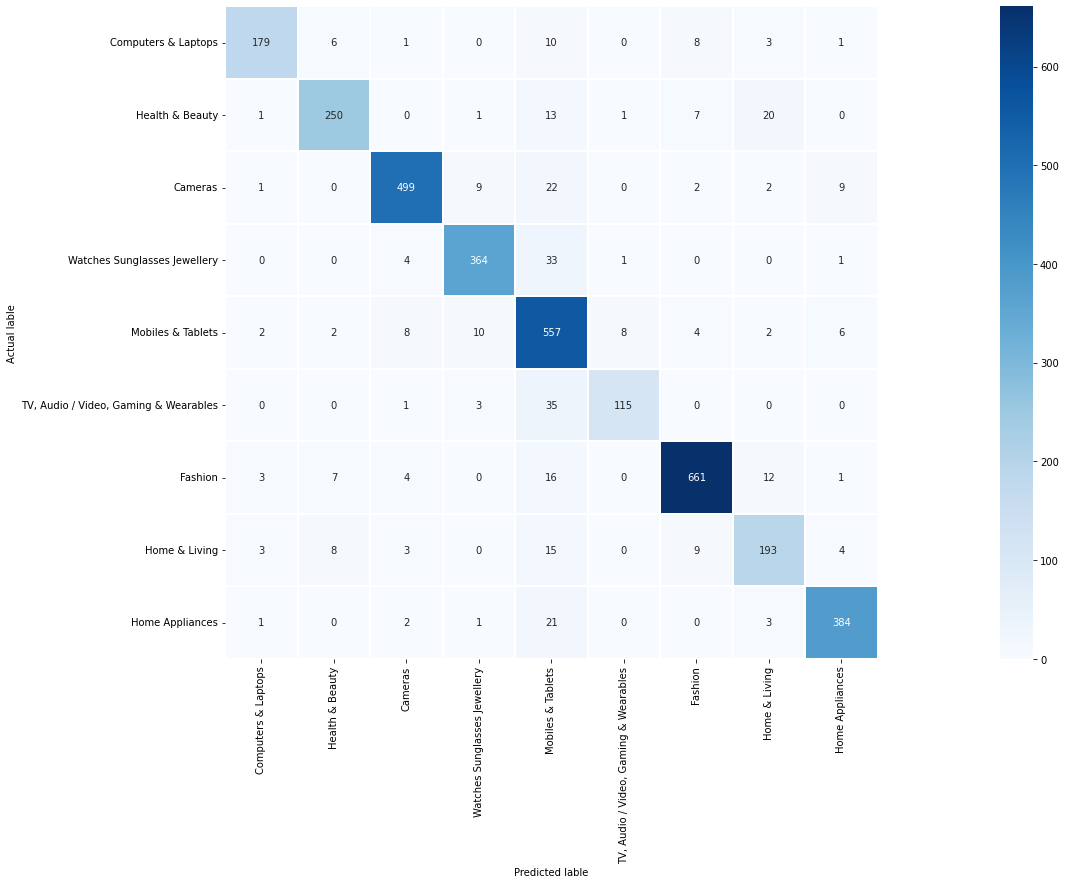

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c1)*100)
cf_matrix = confusion_matrix(y_test, Y_Pred_c1)
print(classification_report(y_test, Y_Pred_c1))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c1, yticklabels= unique_label_c1  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### *CATEGORY 2*

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y2, test_size=0.3, stratify= Y2, random_state=42)


SVM_Classfier=SVC(kernel='linear' , random_state=0)
model2=SVM_Classfier.fit(X_train,y_train)
Y_Pred_c2=model2.predict(X_test)
print(Y_Pred_c2)


[29.  2. 56. ...  0. 56.  0.]


### *CATEGORY 2 STATISTICS*

Accuracy score with linear kernel is : 
81.13738738738738


C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       662
         1.0       0.79      0.84      0.81       114
         2.0       0.91      0.43      0.59        23
         3.0       0.69      0.55      0.61        33
         4.0       0.73      0.51      0.60        43
         5.0       0.92      0.92      0.92        37
         6.0       1.00      0.14      0.25         7
         7.0       0.85      0.81      0.83        77
         8.0       0.86      0.76      0.81       146
         9.0       0.92      0.92      0.92        12
        10.0       0.97      0.88      0.92        34
        11.0       0.50      0.50      0.50         6
        12.0       1.00      0.73      0.84        11
        13.0       1.00      0.33      0.50         6
        14.0       0.91      0.93      0.92        44
        15.0       0.86      0.80      0.83        45
        16.0       0.94      0.91      0.92        32
        17.0       0.77    

Text(0.5, 87.0, 'Predicted lable')

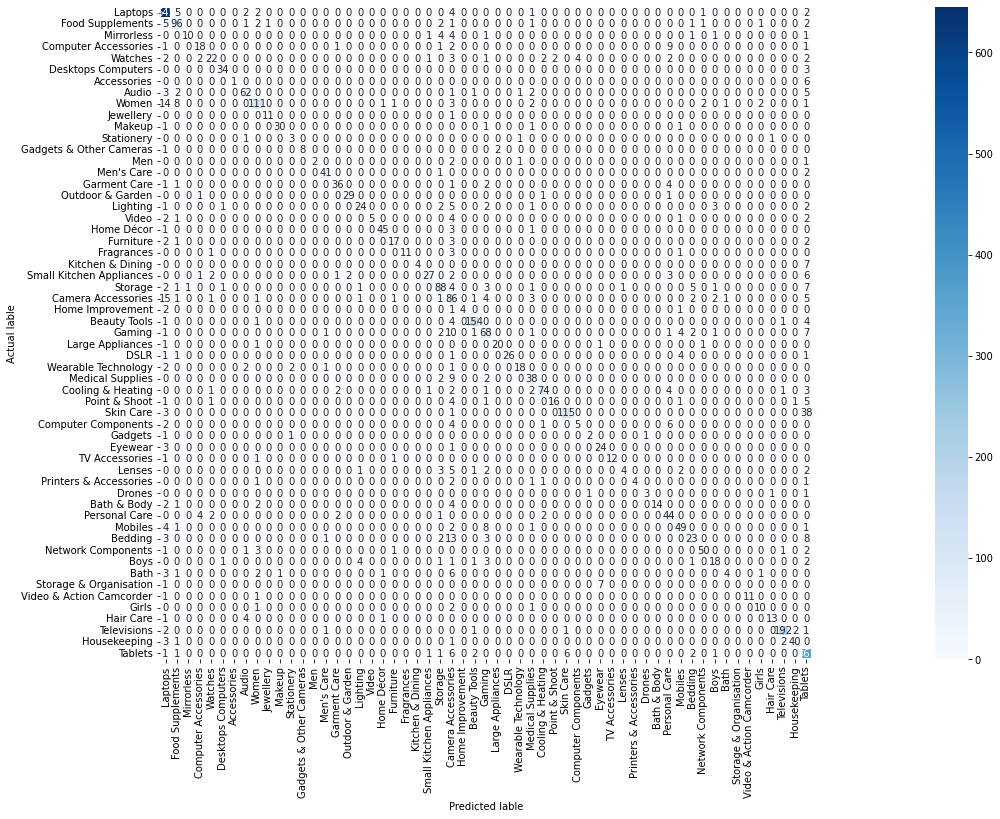

In [19]:
print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c2)*100)

cf_matrix = confusion_matrix(y_test, Y_Pred_c2)
print(classification_report(y_test, Y_Pred_c2))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c2, yticklabels= unique_label_c2  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### *CATEGORY 3*

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y3, test_size=0.3, stratify= Y3, random_state=42)

SVM_Classfier=SVC(kernel='linear' , random_state=0)
model3=SVM_Classfier.fit(X_train,y_train)
Y_Pred_c3=model3.predict(X_test)



### *CATEGORY 3 STATISTICS*

Accuracy score with linear kernel is : 
70.4391891891892
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.75      0.84      0.79        56
         2.0       1.00      0.22      0.36         9
         3.0       0.50      0.42      0.45        12
         4.0       1.00      0.67      0.80         6
         5.0       0.88      0.64      0.74        11
         6.0       0.83      0.45      0.59        11
         7.0       1.00      0.50      0.67         6
         8.0       0.43      0.21      0.29        14
         9.0       0.87      0.91      0.89        85
        10.0       0.71      0.71      0.71        17
        11.0       0.25      0.17      0.20         6
        12.0       0.88      0.58      0.70        12
        13.0       1.00      0.43      0.60         7
        14.0       0.61      0.52      0.56        42
        15.0       0.97      0.91      0.94        33
        16.0       0.83 

C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Text(0.5, 949.1999999999997, 'Predicted lable')

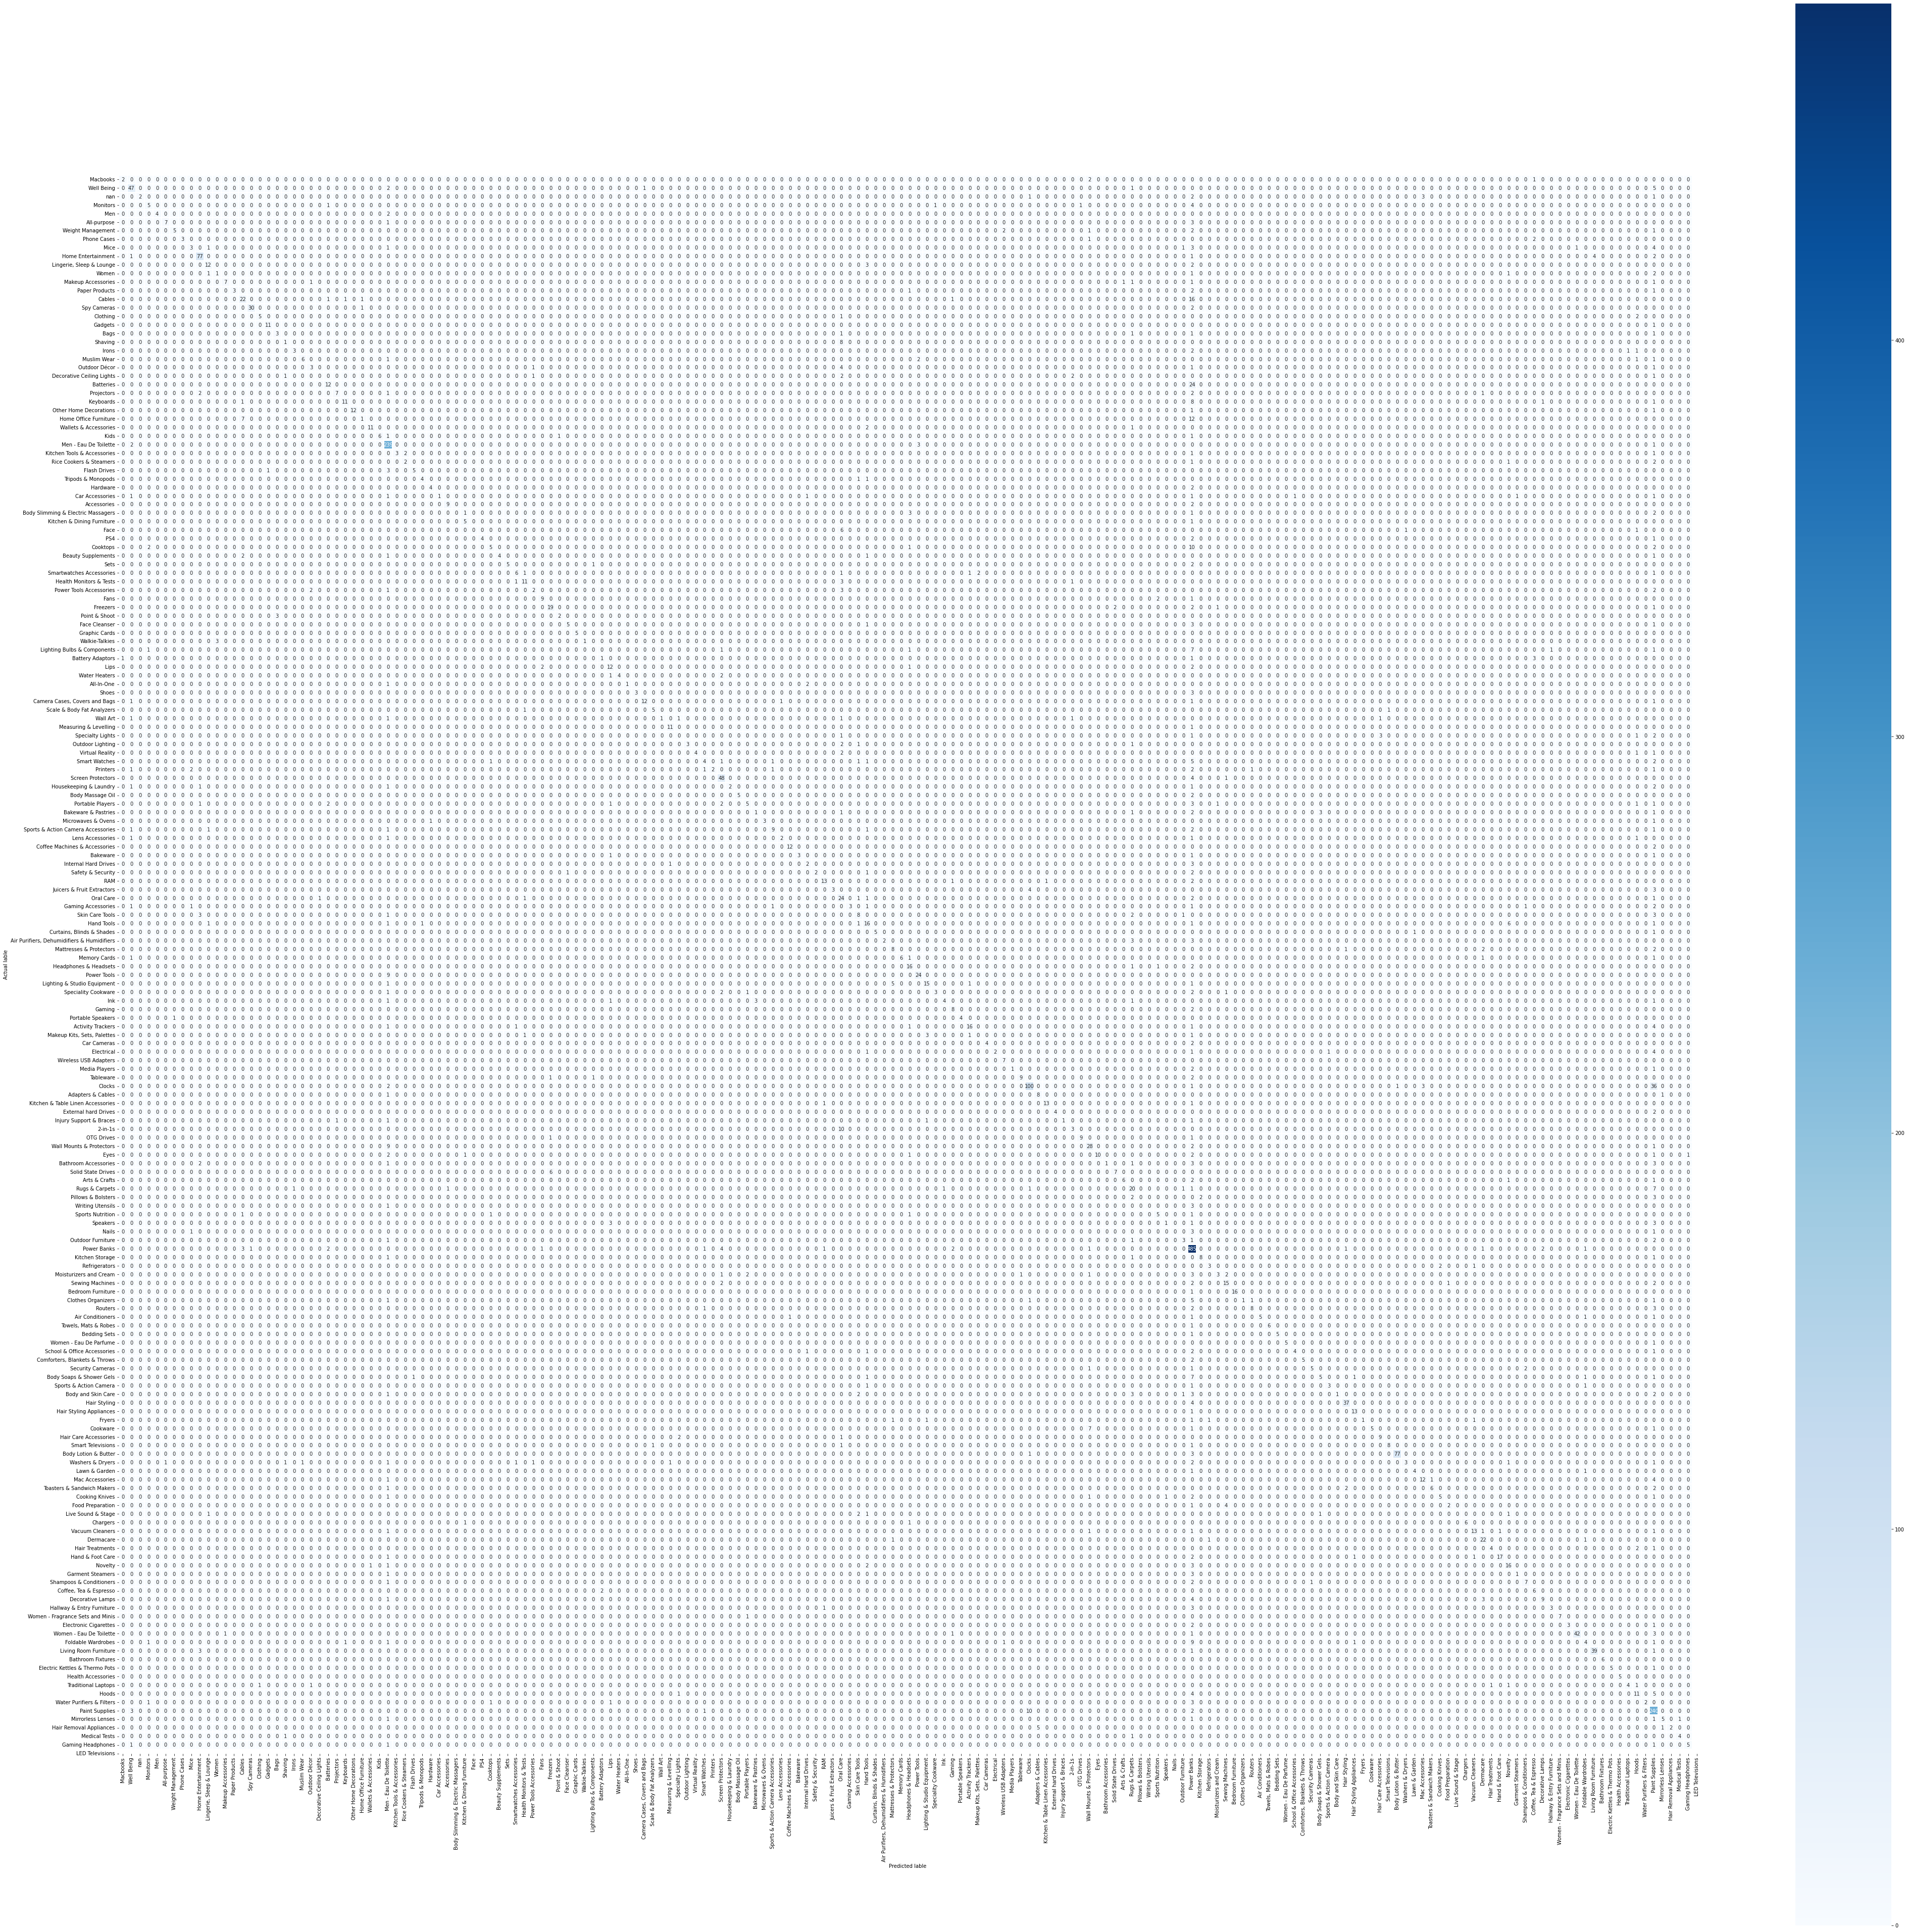

In [23]:
print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c3)*100)

cf_matrix = confusion_matrix(y_test, Y_Pred_c3)
print(classification_report(y_test, Y_Pred_c3))

plt.figure(figsize=(70,70))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c3, yticklabels= unique_label_c3  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### ***MODEL TESTING***

*DATA VALID CSV READ*

In [7]:

labels=["country", "sku_id", "title", "category_lvl1","category_lvl2","category_lvl3", "description", "price", "type"]

def NullStatistics(df):
    missing_val = df.isnull().sum()
    print(missing_val)
    total_cells = np.product(df.shape)
    missing_percent = (missing_val.sum()/total_cells) *100
    print(f'\nThe missing data percent is: {missing_percent}')

testingDataset=pd.read_csv('data_valid.csv' , header=None, names=labels) 

train_df,Y1,Y2,Y3=Utilities.Cleaning_Data_Utility(testingDataset) 

NullStatistics(train_df)

unique_label_c1, unique_label_c2, unique_label_c3 = KNNImpute.preserve_label(train_df) 

KNNImpute.encode(['category_lvl1', 'category_lvl2', 'category_lvl3'],train_df)      

train_df_imputed = KNNImpute.impute(train_df)
train_df_imputed =  KNNImpute.clean_csv(train_df_imputed,train_df)
NullStatistics(train_df_imputed)

0        Apple MacBook Pro MGXC2ZP/A 16GB i7 15.4-inch ...
1        BRAND'S® American Ginseng Triple Pack (3x 6's)...
2        Canon EOS M10 Mirrorless Digital Camera 18MP w...
3        Dell LED Monitor 23" (E2316H) <div class="prod...
4        Esprit Tallac Brave Nubuck Sand ES107601001 Be...
                               ...                        
11833    Olen Swarovski Crystal ElementsLove Birds Aust...
11834    Adele Bethany BLACK Small ladies Shoulder bag ...
11835    Spigen Neo Hybrid Series Case for iPhone 7 Plu...
11836    Anti-wrinkle Backdrop for Photo Studio Photogr...
11837    Waterproof 170° Rear View Parking Car Camera w...
Name: titleDescp, Length: 11838, dtype: object
category_lvl1      0
category_lvl2      0
category_lvl3    687
titleDescp         0
dtype: int64

The missing data percent is: 1.4508362899138367


C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

The missing data percent is: 0.0


*FEATURE ENGINEERING*

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Turning textual data into numeric for computation
X = train_df_imputed['Title_desc']
Y1 = train_df_imputed['category_lvl1']
Y2 = train_df_imputed['category_lvl2']
Y3 = train_df_imputed['category_lvl3']

# vectorizer = TfidfVectorizer()
# vectorizer.fit(X)   #Test (Unseen data is never fitted)
x_test_tfidf = vectorizer.transform(X)



### CATEGORY *1* PREDICTION

In [16]:
y_pred_cat_one = model1.predict(x_test_tfidf)


CATEGORY 1 STATISTICS

95.0244973813144
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       646
         1.0       0.95      0.92      0.94       965
         2.0       0.98      0.96      0.97      1855
         3.0       0.97      0.95      0.96      1339
         4.0       0.89      0.96      0.92      1993
         5.0       0.97      0.88      0.92       525
         6.0       0.97      0.97      0.97      2328
         7.0       0.89      0.91      0.90       824
         8.0       0.97      0.97      0.97      1363

    accuracy                           0.95     11838
   macro avg       0.95      0.94      0.94     11838
weighted avg       0.95      0.95      0.95     11838



Text(0.5, 87.0, 'Predicted lable')

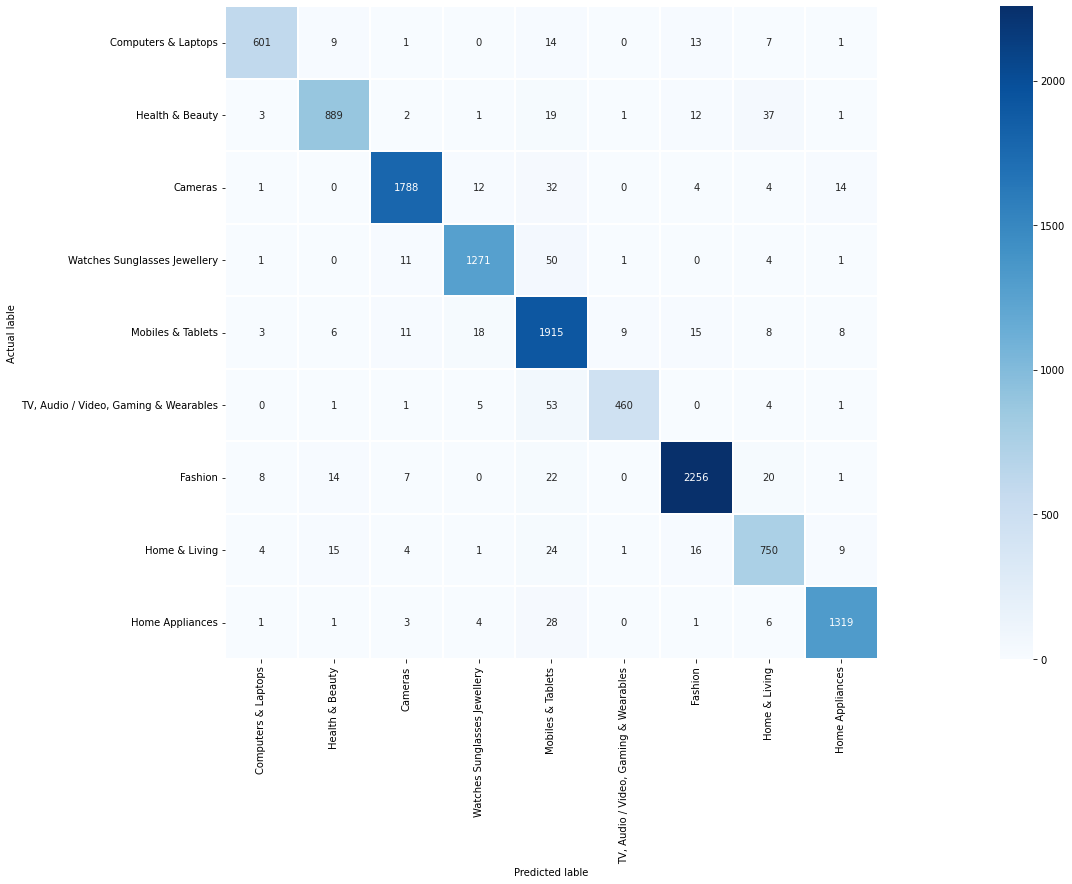

In [17]:
print(metrics.accuracy_score(Y1, y_pred_cat_one)*100)
cf_matrix = confusion_matrix(Y1, y_pred_cat_one)
print(classification_report(Y1, y_pred_cat_one))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c1, yticklabels= unique_label_c1  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### *CATEGORY 2*

In [20]:
y_pred_cat_2 = model2.predict(x_test_tfidf)


CATEGORY 2 STATISTICS

90.80081094779524
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      2206
         1.0       0.87      0.91      0.89       381
         2.0       0.97      0.76      0.85        78
         3.0       0.89      0.82      0.85       111
         4.0       0.93      0.77      0.84       144
         5.0       0.98      0.96      0.97       124
         6.0       1.00      0.41      0.58        22
         7.0       0.91      0.91      0.91       256
         8.0       0.91      0.87      0.89       485
         9.0       0.95      0.98      0.96        41
        10.0       0.98      0.92      0.95       114
        11.0       0.79      0.79      0.79        19
        12.0       1.00      0.84      0.91        38
        13.0       1.00      0.74      0.85        19
        14.0       0.97      0.98      0.97       146
        15.0       0.95      0.92      0.93       151
        16.0       0.96      0.94      0.95       108
        1

Text(0.5, 87.0, 'Predicted lable')

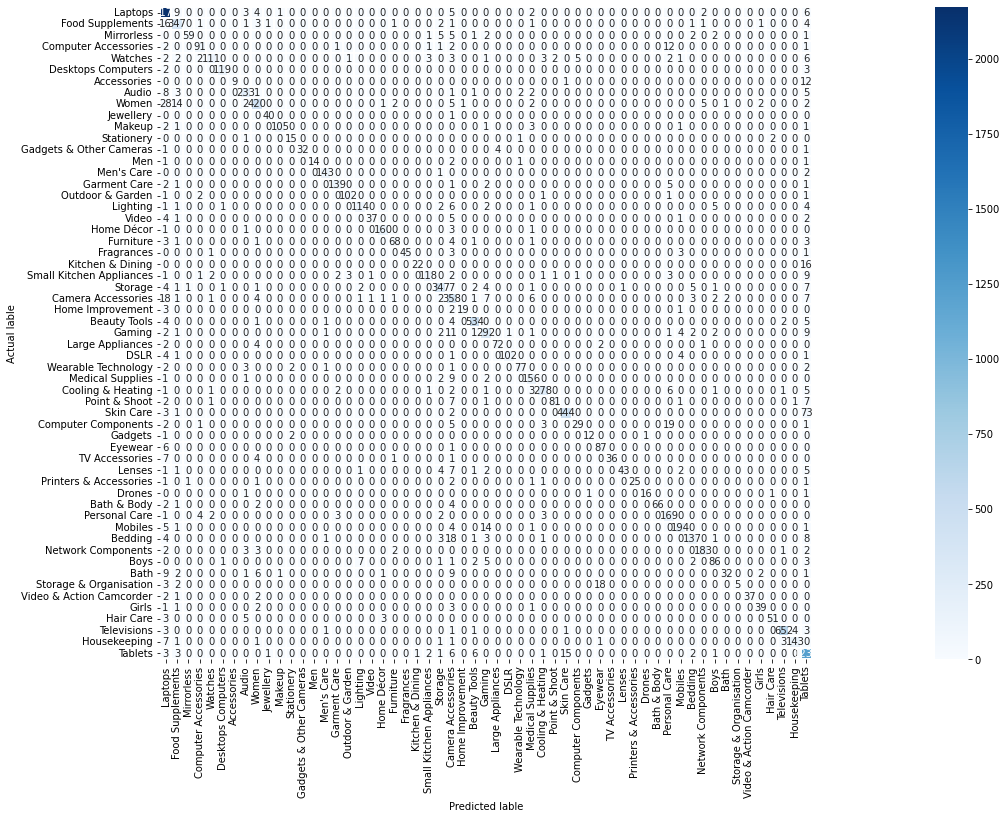

In [21]:
print(metrics.accuracy_score(Y2, y_pred_cat_2)*100)
cf_matrix = confusion_matrix(Y2, y_pred_cat_2)
print(classification_report(Y2, y_pred_cat_2))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c2, yticklabels= unique_label_c2  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### CATEGORY *3*

In [24]:
y_pred_cat_3 = model3.predict(x_test_tfidf)
print(metrics.accuracy_score(Y3, y_pred_cat_3)*100)

86.31525595539787


CATEGORY 3 STATISTICS

86.31525595539787
              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73        18
         1.0       0.88      0.89      0.89       187
         2.0       0.95      0.68      0.79        31
         3.0       0.72      0.72      0.73        40
         4.0       1.00      0.84      0.91        19
         5.0       0.97      0.86      0.91        36
         6.0       0.97      0.81      0.88        37
         7.0       1.00      0.85      0.92        20
         8.0       0.89      0.69      0.78        45
         9.0       0.94      0.95      0.95       283
        10.0       0.85      0.85      0.85        55
        11.0       0.80      0.76      0.78        21
        12.0       0.94      0.85      0.89        40
        13.0       1.00      0.74      0.85        23
        14.0       0.78      0.72      0.75       141
        15.0       0.95      0.91      0.93       110
        16.0       0.96      0.86      0.91        28
        1

Text(0.5, 87.0, 'Predicted lable')

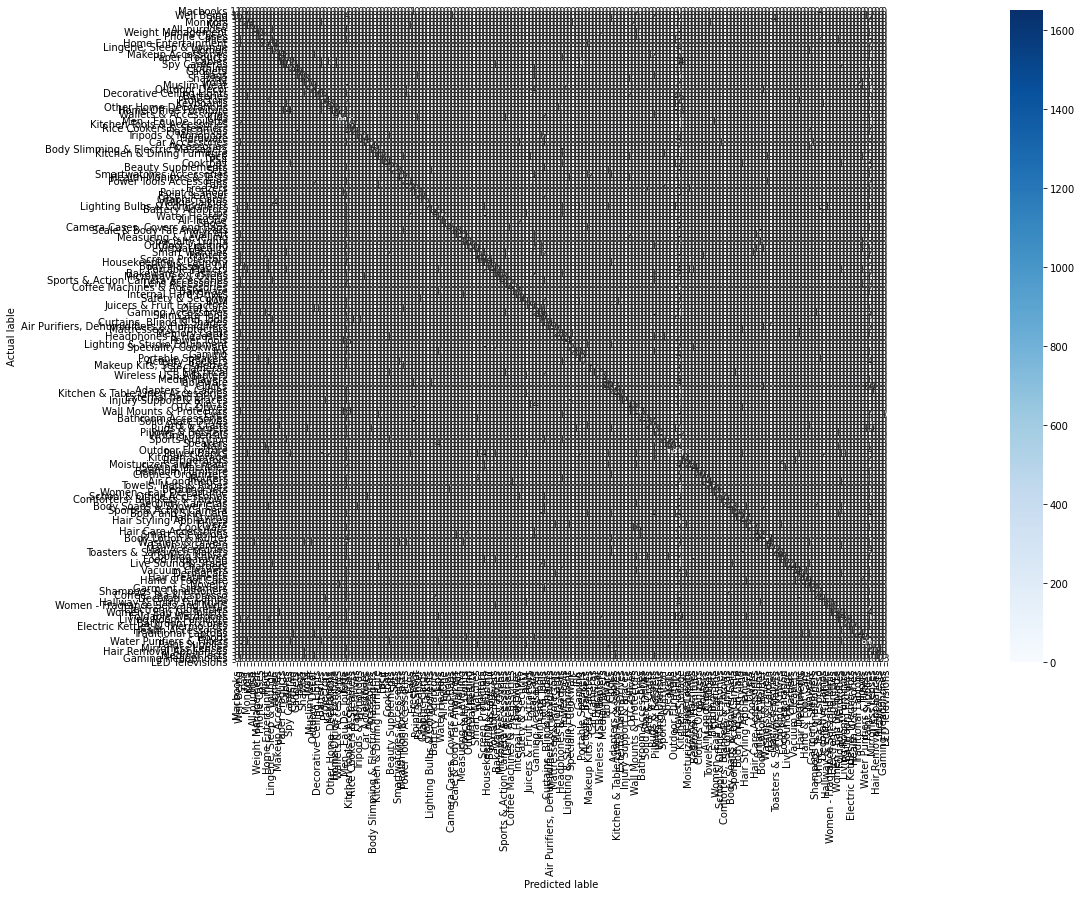

In [25]:
print(metrics.accuracy_score(Y3, y_pred_cat_3)*100)
cf_matrix = confusion_matrix(Y3, y_pred_cat_3)
print(classification_report(Y3, y_pred_cat_3))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c3, yticklabels= unique_label_c3  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

In [25]:
def decode_cat01(number):
    le =LabelEncoder()
    le.fit(unique_label_c1)
    LabelEncoder()
    # print(list(le.classes_))  # print to check classes
    le.transform(unique_label_c1)

    return str(le.inverse_transform([number]))

def decode_cat02(number):
    le =LabelEncoder()
    le.fit(unique_label_c2)
    LabelEncoder()
    # print(list(le.classes_))  # print to check classes
    le.transform(unique_label_c2)

    return str(le.inverse_transform([number]))

def decode_cat03(number):
    le =LabelEncoder()
    le.fit(unique_label_c3)
    LabelEncoder()
    # print(list(le.classes_))  # print to check classes
    le.transform(unique_label_c3)

    return str(le.inverse_transform([number]))
    

print(decode_cat01(1))
print(decode_cat02(29))
print(decode_cat03(98))


['Computers & Laptops']
['Laptops']
['Macbooks']


In [16]:
train_df_imputed

,category_lvl1,category_lvl2,category_lvl3,Title_desc
0,1.0,29.0,98.0,appl macbook pro mgxc zp gb inch retina displa...
1,3.0,15.0,177.0,brand american ginseng tripl pack x bottl x gm...
2,0.0,37.0,154.0,canon eo mirrorless digit camera mp mm len whi...
3,1.0,8.0,112.0,dell led monitor e h div class prod content di...
4,8.0,54.0,106.0,esprit tallac brave nubuck sand es beig leathe...
...,...,...,...,...
11833,8.0,27.0,179.0,olen swarovski crystal elementslov bird austri...
11834,2.0,56.0,9.0,adel bethani black small ladi shoulder bag ul ...
11835,6.0,0.0,125.0,spigen neo hybrid seri case iphon plu champagn...
11836,0.0,7.0,91.0,anti wrinkl backdrop photo studio photographi ...
